In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
from keras import layers
import random

# File opening and data processing

In [ ]:
def read_data(file):
  data_raw = []
  labels = []
  for line in file:
    line = line.strip()
    if line.startswith('>'):
        if (line.find('functional_false')!= -1):
            labels.append(0)
        if (line.find('functional_true')!= -1):
            labels.append(1)
    else:
        data_raw.append(line)
  #now we need to delete spaces and join the sequences
  data = []
  for i in range (0,len(data_raw)-2,3):
    data.append(np.core.defchararray.add(data_raw[i],data_raw[i+1]))
  return np.array(data), labels

file = open('MSA_nat_with_annotation.faa')
data_nat, labels_nat = read_data(file)

file = open('MSA_art.faa')
data_art, labels_art = read_data(file)

In [ ]:
#controllo
print(np.array(data_art))
print(labels_art)


['-----SLEELRKEIESIDREIVELIARRTYVAKTIAQIKRERGLPTTDESQEQRVMERAGSNAKQFD-VDANLVKAIFKLLIELNKEEQRENR---'
 '---TERLNELRDQIDQVDKELLKLLAKRLSLVAEVGEVKSRHGLPIYAPEREASMLASRRTEAEKMG-IPPDLIEDILRRIMRESYANENDHGFKT'
 '--TDNPLLALREKISALDLKLLDLLAERRELALEVAQTKLKSHRPIRDKERERDLLNSLIAEGK-KRGLDGHYITRLFQMIIEDSVLTQQALLQKH'
 ...
 'HQTTEGLHQLRGQIDEIDNSLMELLAKRFRICREIGTYKKEHNMTVLQTGRYNEILEKRGAQGSLCG-MDAEFMAQVFEEIHEESVRQQLEIINK-'
 '----KDLKYLRDEIDKIDKEMIKLFQKRMDVSKKVAEYKMKNDMDILDKSREEEVIKKNLKNLENKS--IKDETKVFLKNLMEISRNIQKKEFKES'
 '----TTIEEVRNEIEQIDEEILRLIKKRVDLATKILEIKRKEGLSINDDTQNQLVINRATNSATELN-LDTGAVKEIFEILIDMSIERQHELSGEG']
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#Task 1: One Hot Encoding

In [ ]:
def one_hot_encode(data):

  aminoacids='ACDEFGHIKLMNPQRSTVWY'
  s = pd.Series(list(aminoacids))
  string = np.array(pd.get_dummies(s))
  bar = np.zeros(len(string))

  sequences=np.array(data)
  data_encoded=np.zeros((len(sequences), len(sequences[0]),len(aminoacids)))

  for i in range (len(sequences)):
    for k in range (len(sequences[0])):
      for j in range(len(aminoacids)):
        if sequences[i][k]==aminoacids[j]:
          data_encoded[i][k] = string[j]
        if sequences[i][k]=='-':
          data_encoded[i][k] = bar
  return np.array(data_encoded)

data_nat_encoded = one_hot_encode(data_nat)
data_art_encoded = one_hot_encode(data_art)

In [ ]:
#controllo funzionamento
print(len(data_art_encoded[1][1]))
for i in range (len(data_art_encoded[1][1])):
  print(data_art_encoded[0][7][i])#qui analizzo la sequenza di 0 e 1 associata alla lettera(cioè all'aminoacidscido) collacato al sesto posto della sequenza presente nella prima riga
data_art = np.array(data_art)
print(data_art[0][7])#qui hai la lettera 6 del vettore numero 0 fra i 1003 totali
#funziona!

20
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
E


# Task 2: Dimensional reduction and visualization of sequence space

(1130, 1920)
(1003, 1920)
[[ 0.02499085 -0.00014142  0.00850738 ... -0.00030564 -0.00603507
  -0.01892986]
 [ 0.03178438  0.00244719 -0.00952908 ... -0.00201428  0.12684059
  -0.06064087]
 [ 0.0155239  -0.00101528  0.00398377 ...  0.0131069  -0.00383132
   0.00709655]
 ...
 [-0.00860016 -0.04134116  0.00345304 ...  0.04484728 -0.00648347
  -0.01033736]
 [-0.01380019  0.0204631   0.00578959 ...  0.00772308 -0.02310218
  -0.00200839]
 [-0.0532456  -0.02690218 -0.03382526 ...  0.01562119  0.00511753
   0.00516955]]
(1130, 1920)
[0.000e+00 1.000e+00 2.000e+00 ... 1.127e+03 1.128e+03 1.129e+03]


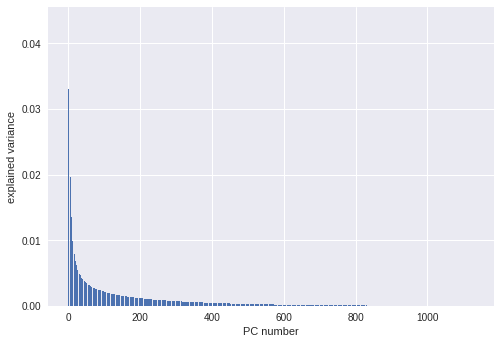

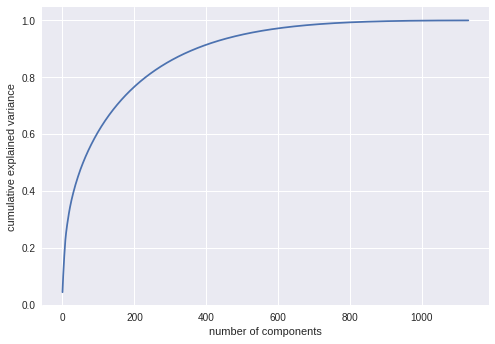

In [ ]:
#to apply PCA we need to reshape the tensors with data into matrices of 96*20 columns
data_nat_pca = np.reshape(data_nat_encoded,(len(data_nat), len(data_nat[0])*20))
print(np.shape(data_nat_pca))

data_art_pca = np.reshape(data_art_encoded,(len(data_art), len(data_art[0])*20))
print(np.shape(data_art_pca))

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

pca = PCA(n_components = data_nat_pca.shape[0])
pca.fit(data_nat_pca)
variances = pca.explained_variance_ratio_
print(pca.components_)
print(pca.components_.shape)

tmp = np.zeros(data_nat_pca.shape[0])
for i in range (data_nat_pca.shape[0]):
  tmp[i] = i
print(tmp)

plt.bar(tmp,variances)
plt.xlabel('PC number')
plt.ylabel('explained variance');
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))  #cumulative sum
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

(1130, 1920)
(1130, 502)
(1130, 1920)
(1130, 2)


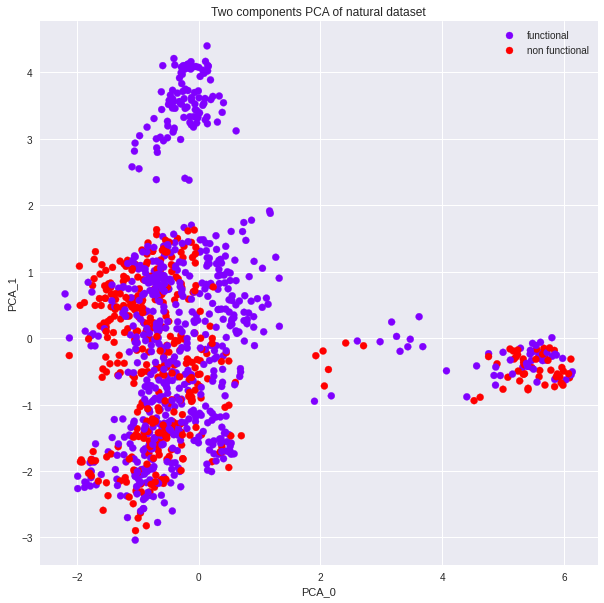

In [ ]:
#keep 95% of the variance of the natural data
clf = PCA(0.95)
X_trans_nat = clf.fit_transform(data_nat_pca)
print(data_nat_pca.shape)    #shape of original data
print(X_trans_nat.shape)  #shape of the compressed data

#project the data in 2d to plot
pca = PCA(2)
Xproj_nat = pca.fit_transform(data_nat_pca)
print(data_nat_pca.shape)
print(Xproj_nat.shape)

classes = ['Functional', 'Non Functional']
plt.figure(figsize=(10,10))
scatter = plt.scatter(Xproj_nat[:, 0], Xproj_nat[:, 1], c=labels_nat, cmap='rainbow')
plt.title('Two components PCA of natural dataset')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.legend(handles=scatter.legend_elements()[0], labels=['functional','non functional'],loc="upper right")

(1003, 1920)
(1003, 313)
(1003, 1920)
(1003, 2)


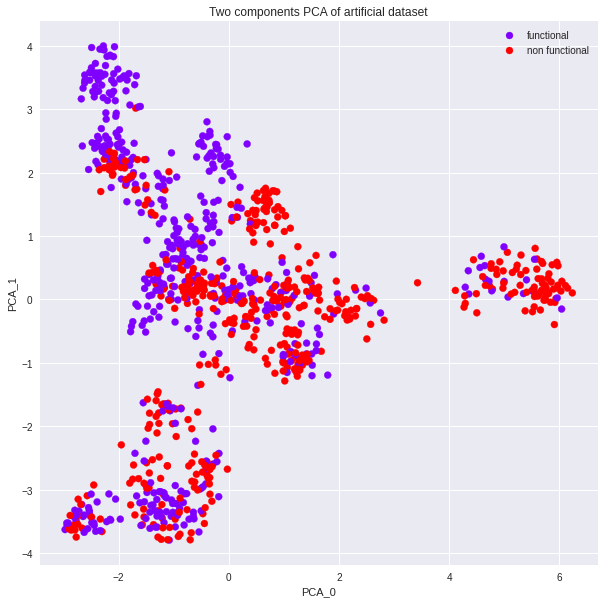

In [ ]:
#project also the artificial data in 2D
clf = PCA(0.95)
X_trans_art = clf.fit_transform(data_art_pca)
print(data_art_pca.shape)    #shape of original data
print(X_trans_art.shape)  #shape of the compressed data

#project the data in 2d to plot
pca = PCA(2)
Xproj_art = pca.fit_transform(data_art_pca)
print(data_art_pca.shape)
print(Xproj_art.shape)

classes = ['Functional', 'Non Functional']
plt.figure(figsize=(10,10))
scatter = plt.scatter(Xproj_art[:, 0], Xproj_art[:, 1], c=labels_art, cmap='rainbow')
plt.title('Two components PCA of artificial dataset')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.legend(handles=scatter.legend_elements()[0], labels=['functional','non functional'],loc="upper right")

# Task 3: clustering sequence data

we apply a k-means algorithm with k = 2 to both natural and artificial data to see if the clustering can distinguish functional proteins to non functional ones

Text(0, 0.5, 'PCA_1')

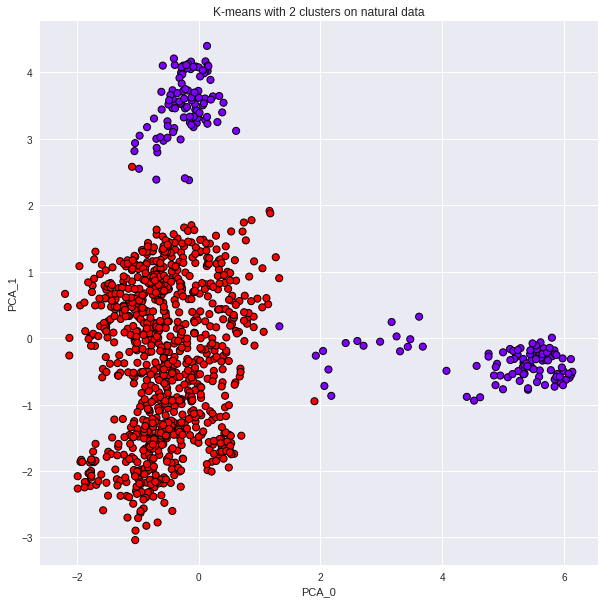

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='k-means++', n_init=20, max_iter=600, tol=1e-04, random_state=0)
y_km = km.fit(data_nat_pca)
y_pred = y_km.labels_.astype(int)

plt.figure(figsize=(10,10))
scatter = plt.scatter(Xproj_nat[:, 0], Xproj_nat[:, 1], c=y_pred, s=50, cmap='rainbow',edgecolor='black', linewidth=1)
plt.title('K-means with 2 clusters on natural data')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')

Text(0, 0.5, 'PCA_1')

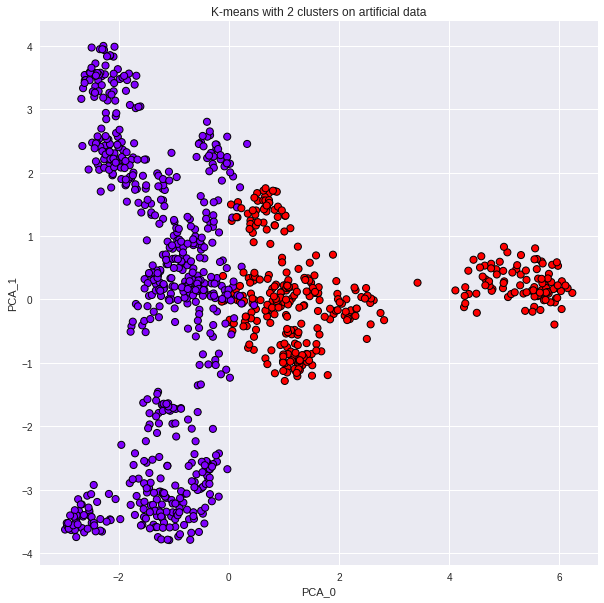

In [ ]:
y_km = km.fit(data_art_pca)
y_pred = y_km.labels_.astype(int)

plt.figure(figsize=(10,10))
scatter = plt.scatter(Xproj_art[:, 0], Xproj_art[:, 1], c=y_pred, s=50, cmap='rainbow',edgecolor='black', linewidth=1)
plt.title('K-means with 2 clusters on artificial data')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')


Now we unify the two datasets and apply the k-means algorrithm, to check if it can distinguish between natural and artifical proteins

(2133, 1920)
(2133,)


Text(0, 0.5, 'PCA_1')

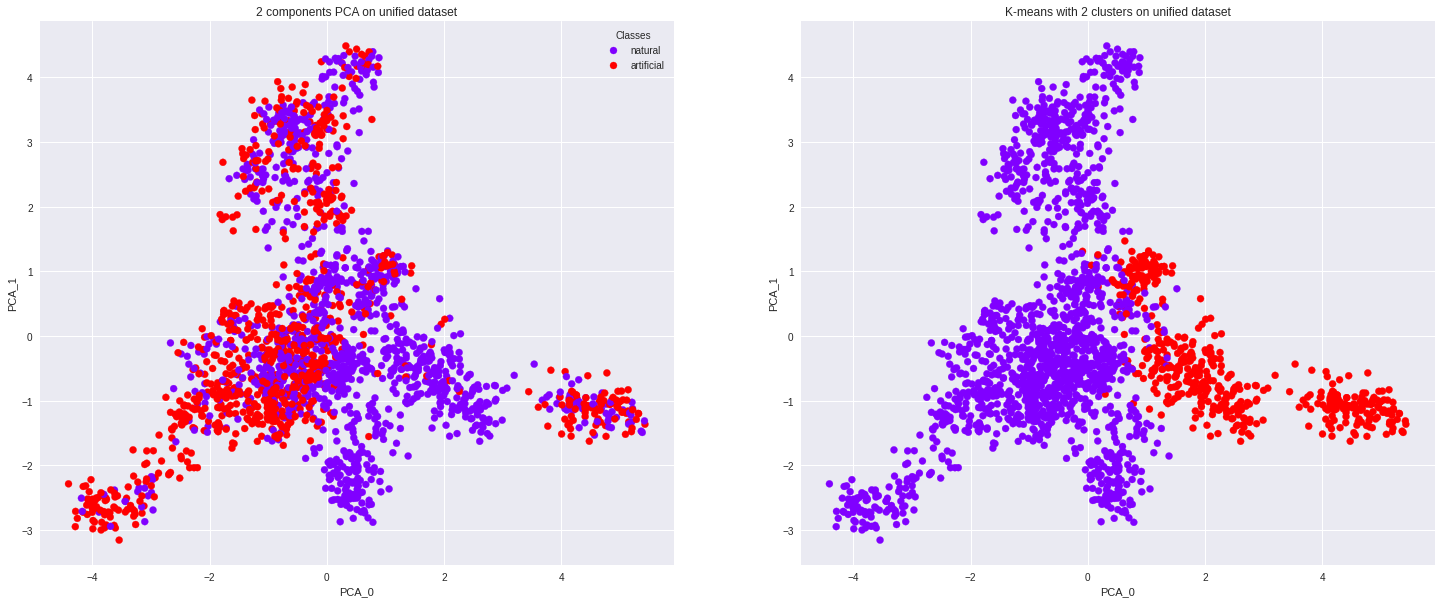

In [ ]:
data_unif = np.concatenate((data_nat_pca, data_art_pca), axis=0)
print(data_unif.shape)

labels_unif = np.concatenate((labels_nat,labels_art), axis=0)
print(labels_unif.shape)

Xproj_unif = pca.fit_transform(data_unif)

y_km = km.fit(data_unif)
y_pred = y_km.labels_.astype(int)


data=['natural','artificial']
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
scatter=plt.scatter(Xproj_unif[:,0],Xproj_unif[:,1],c=labels_unif, cmap='rainbow')
plt.title('2 components PCA on unified dataset')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.legend(handles=scatter.legend_elements()[0], labels=data,loc="upper right", title="Classes")


plt.subplot(1,2,2)
scatter=plt.scatter(Xproj_unif[:,0],Xproj_unif[:,1],c=y_pred, cmap='rainbow')
plt.title('K-means with 2 clusters on unified dataset')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')

# Task 4: predicting protein functionality

We built a Neural Network to classify proteins into functionals and non functionals

In [ ]:
#one hot encoding of the labels
labels_nat = keras.utils.to_categorical(labels_nat)
labels_art = keras.utils.to_categorical(labels_art)

In [ ]:
#definition of the model
keras.backend.clear_session()
model = keras.Sequential([
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          #keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          #keras.layers.Dense(4, activation='relu'),
                          keras.layers.Dense(2, activation='softmax'),
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['AUC'])

#training of the model on the natural data
history = model.fit(data_nat_pca, labels_nat, epochs=100, batch_size=100, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 40ms/step - loss: 0.7014 - auc: 0.4926 - val_loss: 0.7473 - val_auc: 0.1158
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6967 - auc: 0.5126 - val_loss: 0.7356 - val_auc: 0.1416
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6931 - auc: 0.5403 - val_loss: 0.7283 - val_auc: 0.1685
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6907 - auc: 0.5702 - val_loss: 0.7199 - val_auc: 0.2162
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6884 - auc: 0.6068 - val_loss: 0.7134 - val_auc: 0.2779
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6867 - auc: 0.6371 - val_loss: 0.7100 - val_auc: 0.3202
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6853 - auc: 0.6563 - val_loss: 0.7102 - val_auc: 0.3215
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 0.68

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                122944    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 125,306
Trainable params: 125,306
Non-trainable params: 0
_________________________________________________________________


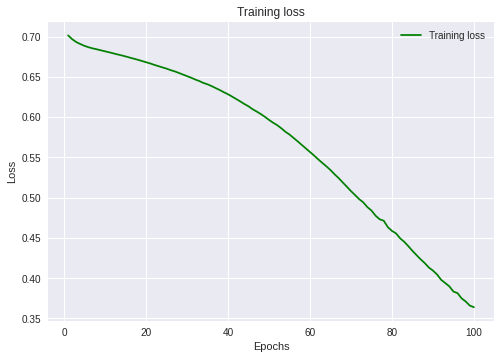

In [ ]:
# plot traing e validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label='Training loss')
#plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

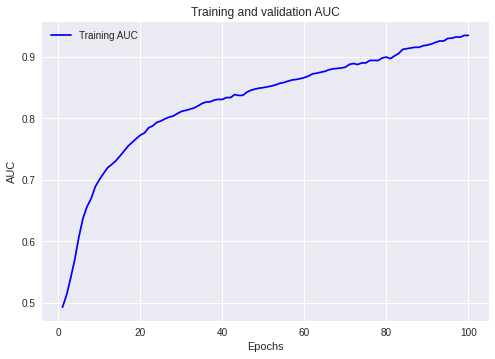

In [ ]:
#plotting trainig e validation AUC

acc_values = history_dict['auc']
val_acc_values = history_dict['val_auc']

plt.clf()
plt.plot(epochs, acc_values, 'b', label='Training AUC')
#plt.plot(epochs, val_acc_values, 'orange', label='Validation AUC')
plt.title('Training and validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [ ]:
#now we use the model to make predictions on the test set of the artificial proteins

TP = 0
FP = 0
TN = 0
FN = 0

predictions = model.predict(data_art_pca)

for n in range(0, len(data_art_pca)):

  print(predictions[n])
  print('Max probability for number:', np.argmax(predictions[n]))
  print(labels_art[n])
  print('True label is:',np.argmax(labels_art[n]))
  print('\n')

  if np.argmax(labels_art[n]) == 0:
      if np.argmax(predictions[n]) == 0:
          TN += 1
      else:
          FP+= 1

  if np.argmax(labels_art[n]) == 1:
      if np.argmax(predictions[n]) == 1:
          TP += 1
      else:
          FN+= 1

print('true positives:', TP)
print('true negatives:', TN)
print('false positives:', FP)
print('false negatives:', FN)
print('Accuracy on test set =',(TN+TP)/(TN+TP+FN+FP))

Output streaming troncato alle ultime 5000 righe.
True label is: 1


[0.9989767  0.00102319]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.9973021  0.00269786]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.9988329  0.00116711]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.82554954 0.17445043]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.9476189  0.05238111]
Max probability for number: 0
[0. 1.]
True label is: 1


[0.9877594  0.01224054]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.8053547  0.19464521]
Max probability for number: 0
[0. 1.]
True label is: 1


[0.91444504 0.08555489]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.00340419 0.99659574]
Max probability for number: 1
[0. 1.]
True label is: 1


[0.4515775 0.5484224]
Max probability for number: 1
[1. 0.]
True label is: 0


[0.0012362 0.9987638]
Max probability for number: 1
[1. 0.]
True label is: 0


[9.9921387e-01 7.8611943e-04]
Max probabilit

In [ ]:
#we do the same with the natural proteins

TP = 0
FP = 0
TN = 0
FN = 0

predictions = model.predict(data_nat_pca)

for n in range(0, len(data_nat_pca)):

  print(predictions[n])
  print('Max probability for number:', np.argmax(predictions[n]))
  print(labels_nat[n])
  print('True label is:',np.argmax(labels_nat[n]))
  print('\n')

  if np.argmax(labels_nat[n]) == 0:
      if np.argmax(predictions[n]) == 0:
          TN += 1
      else:
          FP+= 1

  if np.argmax(labels_nat[n]) == 1:
      if np.argmax(predictions[n]) == 1:
          TP += 1
      else:
          FN+= 1

print('true positives:', TP)
print('true negatives:', TN)
print('false positives:', FP)
print('false negatives:', FN)
print('Accuracy on train set =',(TN+TP)/(TN+TP+FN+FP))

Output streaming troncato alle ultime 5000 righe.
True label is: 1


[0.51646835 0.48353165]
Max probability for number: 0
[0. 1.]
True label is: 1


[0.9727155  0.02728447]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.7854753  0.21452463]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.9722885  0.02771154]
Max probability for number: 0
[0. 1.]
True label is: 1


[0.981727   0.01827297]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.9707528  0.02924728]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.95607436 0.04392559]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.9739886  0.02601147]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.9763453  0.02365462]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.9829473  0.01705272]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.98028433 0.01971563]
Max probability for number: 0
[1. 0.]
True label is: 0


[0.96078277 0.03921723]
Max probability 

# Task 5: generating artificial sequences

We implemented a Generative Adversal Network to generate sequences of proteins similar to the natural ones

In [ ]:
#integer encoding of the data
from sklearn.preprocessing import LabelEncoder

data_encoded = []

for i in range(0,len(data_nat)):
  sequence = data_nat[i]
  aminoacids='ACDEFGHIKLMNPQRSTVWY'
  alphabet = set(aminoacids)
  alphabet.add('-')
  encoder = LabelEncoder()
  encoder.fit(list(alphabet))
  encoded_sequence = encoder.transform(list(sequence))
  encoded_sequence[encoded_sequence == encoder.transform(['-'])] = 0

  data_encoded.append(encoded_sequence)

data_encoded = np.array(data_encoded)

In [ ]:
from keras import Sequential

#parameters
input_len = len(data_encoded[0])
input_size = len(data_encoded)


#define the generator network
generator = keras.Sequential([
                          keras.layers.Dense(input_len, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(input_len, activation='relu'),
])

generator.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['AUC'])


#define the discriminator network
discriminator = keras.Sequential([
                          keras.layers.Dense(input_len, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
])

discriminator.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['AUC'])

In [ ]:
#definition and training of the GAN
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = [tf.keras.metrics.BinaryAccuracy()])


from numpy import random
noise = random.randint(21, size=(input_size,input_len))

ONES = np.ones((input_size))
ZEROS = np.zeros((input_size))

BATCH = 565
EPOCHS = 10

for e in range(EPOCHS):
    for k in range(input_size//BATCH):
        n = random.randint(0, input_size, size = BATCH)
        p = generator.predict(noise[n])
        x = np.concatenate((data_encoded[n], p))
        y = np.concatenate((ONES[n], ZEROS[n]))
        d_result = discriminator.train_on_batch(x, y)
        discriminator.trainable = False
        g_result = gan.train_on_batch(noise[n], ONES[n])
        discriminator.trainable = True


18/18 [==============================] - 0s 1ms/step


In [ ]:
#generation of new proteins
proteins = generator.predict(noise)
proteins = np.array(proteins).astype(int)
#for i in range(len(proteins)): print(proteins[i])

36/36 [==============================] - 0s 1ms/step
[0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 2 0 0 1 0 0 3 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 3 0 0 0 2 0 1 0 1 1 0 3 0 0 3 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 3 0 0
 0 0 0 1 0 1 0 0 2 0 0 0 0 2 2 1 0 3 1 1 1 0]
[0 3 0 0 0 4 0 0 0 0 5 0 0 7 4 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 4 0 0 0 5 2 4
 0 2 1 0 0 0 3 3 0 0 7 2 0 2 2 4 8 0 0 0 0 0 0 2 4 0 7 0 0 5 5 0 4 0 5 0 0
 0 0 2 1 0 2 0 0 1 0 0 0 3 6 3 0 0 7 5 0 3 0]
[0 1 0 1 0 1 0 0 0 0 2 1 0 4 1 0 0 3 0 0 1 0 1 0 0 0 3 0 0 0 4 0 0 0 2 1 2
 0 1 1 0 0 0 1 0 0 3 3 2 0 1 2 2 6 0 0 0 0 0 0 0 2 0 3 0 0 2 4 0 1 0 5 0 0
 0 0 2 2 0 3 0 0 1 0 0 0 1 5 2 2 0 4 4 0 0 0]
[0 2 0 0 0 4 0 0 0 0 5 0 0 6 4 0 0 1 2 0 0 0 0 1 0 0 1 2 0 0 3 0 1 0 6 0 1
 0 1 2 0 0 1 1 3 0 0 6 0 0 2 3 0 5 0 0 0 0 0 0 2 0 3 3 0 2 2 0 0 3 0 6 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 3 7 2 1 0 3 1 0 1 0]
[0 2 0 0 0 4 0 0 0 0 7 0 0 5 5 0 0 3 4 0 2 0 0 0 0 0 1 2 0 0 7 0 2 0 8 1 3
 0 6 0 0 0 0 1 2 0 0 6 0 0 1 6 0 5 0 0 0 0 0 0 2 1 3 6 0 2 3 0 0 6 0 9 2 0
 0 0 0 2 0 5 

In [ ]:
#one hot encoding of the generated proteins

def one_hot_encode(sequence):
    encoded = np.zeros((sequence.shape[0], sequence.shape[1], 20), dtype=int)
    for i in range(sequence.shape[0]):
        for j in range(sequence.shape[1]):
            encoded[i, j, sequence[i][j]] = 1
    return encoded

encoded_prot = one_hot_encode(proteins)

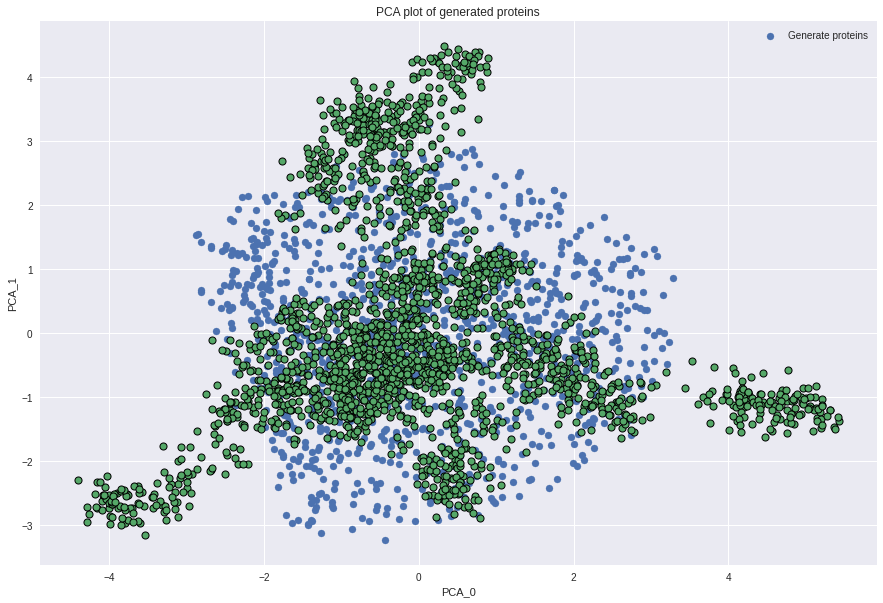

In [ ]:
y = np.reshape(encoded_prot,(len(encoded_prot), len(encoded_prot[0])*len(encoded_prot[0][0])))
pca_y = PCA(n_components = 2)
pca_result_y = pca_y.fit_transform(y)

plt.figure(figsize=(15,10))

plt.scatter(pca_result_y[:,0],pca_result_y[:,1],label='Generate proteins', cmap='tab10')
plt.scatter(Xproj_unif[:, 0], Xproj_unif[:, 1], s=50, cmap='rainbow',edgecolor='black', linewidth=1);
plt.title('PCA plot of generated proteins')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.legend()
plt.show()